# Loading libraries

In [1]:
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
!pip install textblob 
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

#Natural language tooolkit(NLTK) libraries 
import nltk
import re
import string
from nltk.corpus import stopwords
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Machine Learning libraries
import sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.pipeline import Pipeline

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [2]:
data1 = pd.read_csv("C:/Users/USER/Downloads/suicide.csv",encoding= 'unicode_escape')
data1 = data1.loc[:, ~data1.columns.str.contains('^Unnamed')]
data1

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide
...,...,...
233333,If you don't like rock then your not going to ...,non-suicide
233334,You how you can tell i have so many friends an...,non-suicide
233335,pee probably tastes like salty teaðð¦â¼ï...,non-suicide
233336,The usual stuff you find hereI'm not posting t...,suicide


In [3]:
data2 = pd.read_csv("C:/Users/USER/Downloads/test_suicide.csv",encoding= 'unicode_escape')
data2["class"] = "suicide"
data2.drop('id', axis = 1, inplace=True)
data2

,text,class
0,I have to put this in writing somehow so I sti...,suicide
1,I've made my peace with the fact that I'm goin...,suicide
2,I really want help now i just cant so this any...,suicide
3,I can't think of any reason to stay. I have no...,suicide
4,NaN,suicide
...,...,...
493,Since I was 9 I felt depressed and almost took...,suicide
494,I don't know why I'm reaching out now of all t...,suicide
495,"I dont believe in an afterlife, but i stay up ...",suicide
496,"I don't think I actually will kill myself, but...",suicide


# Data filtering

In [4]:
frames = [data1,data2]

In [5]:
data = pd.concat(frames)
data

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide
...,...,...
493,Since I was 9 I felt depressed and almost took...,suicide
494,I don't know why I'm reaching out now of all t...,suicide
495,"I dont believe in an afterlife, but i stay up ...",suicide
496,"I don't think I actually will kill myself, but...",suicide


In [6]:
#shuffling
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [7]:
#lower case
for columns in data.columns:
    data[columns] = data[columns].str.lower() 

In [8]:
data["result"] = np.where(data["class"] == "suicide",1,0)
data.head()

,text,class,result
0,"i was positive about life, but goddamn...it ju...",suicide,1
1,what does ssb mean on snapchat please help wha...,non-suicide,0
2,"peak stupidity me, age 15, finally having it c...",non-suicide,0
3,suicide - there's a life and there is hope.it'...,suicide,1
4,i've been on the brink. it's all getting very ...,suicide,1


In [9]:
data['result'].value_counts()

0    117305
1    116531
Name: result, dtype: int64

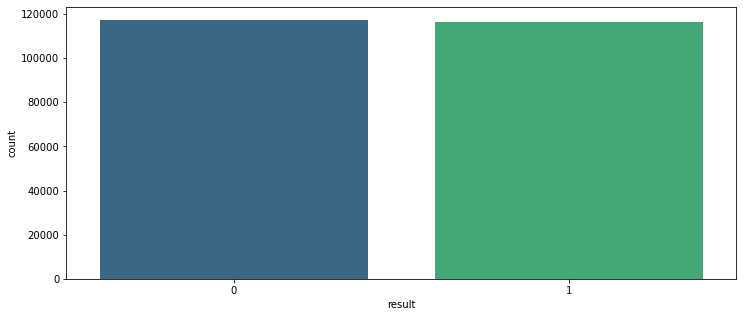

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(data['result'], palette = 'viridis')
plt.show()

# Sentiment Analysis

In [11]:
#creating a function to get the polarity
def sentiment_calc(text):
    try:
        return TextBlob(text).polarity
    except:
        return None

#creating a column
data['polarity'] = data['text'].apply(sentiment_calc)

In [13]:
#creating a function to get the subjectivity
def sentiment_calc(text):
    try:
        return TextBlob(text).subjectivity
    except:
        return None

#creating a column
data['subjectivity'] = data['text'].apply(sentiment_calc)

In [14]:
data.fillna

<bound method DataFrame.fillna of                                                      text        class  \
0       i can't do this anymore.i don't know what else...      suicide   
1       to all 13-15 year old women send me (15 male) ...  non-suicide   
2       if you have a birthday today fuck you with pea...  non-suicide   
3       i don't know what to do.i've been having money...      suicide   
4       guys itâs going well yesterday i got a girlâ...  non-suicide   
...                                                   ...          ...   
233831  margaret and her self-destructive behaviour ai...  non-suicide   
233832  our teacher liked our presentation!!!!!! ahhhh...  non-suicide   
233833  i have no onei wish i could talk to someone wh...      suicide   
233834  i wanna kill myselfi have no friends, no famil...      suicide   
233835  it's getting harderi am always thinking of com...      suicide   

        result  polarity  subjectivity  
0            1  0.131250      0.6625

In [15]:
data.head(10)

,text,class,result,polarity,subjectivity
0,i can't do this anymore.i don't know what else...,suicide,1,0.131250,0.662500
1,to all 13-15 year old women send me (15 male) ...,non-suicide,0,0.116667,0.166667
2,if you have a birthday today fuck you with pea...,non-suicide,0,0.050000,0.600000
3,i don't know what to do.i've been having money...,suicide,1,-0.098280,0.433598
4,guys itâs going well yesterday i got a girlâ...,non-suicide,0,-0.257143,0.604762
5,yo iâm just chilling i want affection ð,non-suicide,0,-0.500000,0.900000
6,some dudes may need this ð you can be a men...,non-suicide,0,0.160238,0.544405
7,planning on killing myselfi wrote a cringey su...,suicide,1,-0.050000,0.250000
8,i'll never find anyone. why even try.i'll pref...,suicide,1,0.032955,0.530357
9,helpi thought i was getting better. i'm not be...,suicide,1,-0.060224,0.502848


In [16]:
df = data.copy()

# Data processing

In [17]:
import pandas as pd
import numpy as np 
!pip install tabulate
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
#nltk.downloader.download('vader_lexicon')
#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

In [18]:
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

#import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [20]:
TextBlob("").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [21]:
df.head()

,text,class,result,polarity,subjectivity
0,i can't do this anymore.i don't know what else...,suicide,1,0.131250,0.662500
1,to all 13-15 year old women send me (15 male) ...,non-suicide,0,0.116667,0.166667
2,if you have a birthday today fuck you with pea...,non-suicide,0,0.050000,0.600000
3,i don't know what to do.i've been having money...,suicide,1,-0.098280,0.433598
4,guys itâs going well yesterday i got a girlâ...,non-suicide,0,-0.257143,0.604762


# Data analysis

In [22]:
df = data.copy()

In [23]:
df['text'] = df['text'].astype(str)

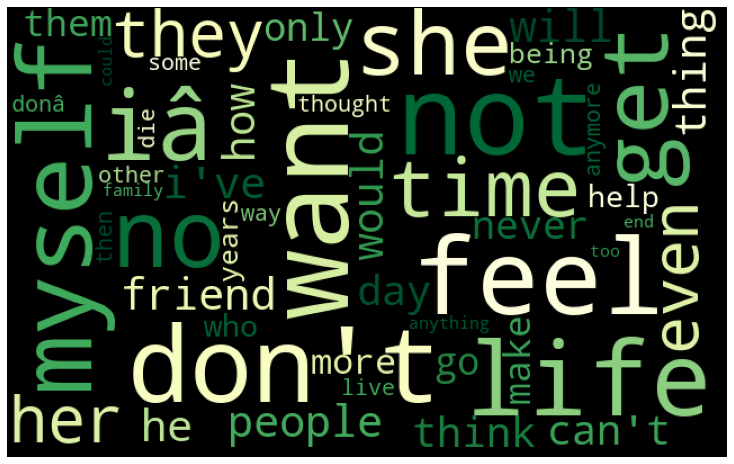

In [24]:
from wordcloud import WordCloud

stopwords=['hey','fuck','fucking','u','are','s', 'have', 'this', 'to', 'in', 'of','but','put','any', 
           'the', 'that','an', 'so', 'with','was','sti ','I\'m', 'wanna', 'NaN', 'goin', 'now', 'sti', 
           'just', 'was', 'really', 'and', 'text', 'since', 'all', 'why', 'up', 'object', 'Length', 
           'actually', 'dtype', 'fact', 'abou ','Name', 'took', 'made', 'at', 'for', 'everytime','somehow', 
           'all', 'out', 'a', 'do', 'post', 'it', 'is', 'me', 'am', 'like', 'om', 'you', 'been', 
           'because', 'when', 'what', 'about', 'say', 'on', 't', 'from', 'ha', 'm', 'can', 'one', 'don', 
           'year', 'be', 'im', 'there', 'much','see', 'n', 've', 'know', 'going', 'or', 'if', 'as', 'off',
           'ago','has', 'here', 'my', 'i', 'I\'m', 'it', 'had', 'keep']

sdata = df[df["class"] == "suicide"]
all_words = ' '.join([text for text in sdata.text])
img = WordCloud(width = 640, height = 400,
               background_color = 'Black', colormap = 'YlGn',
               stopwords =stopwords,
               max_words= 50,
               max_font_size=100,
               random_state= 20,
               collocations=False).generate(all_words)

plt.figure(figsize=(10,20))
plt.subplots_adjust(left=0, right=1,top=1, bottom=0)
plt.imshow(img)
plt.axis('off')

plt.show()

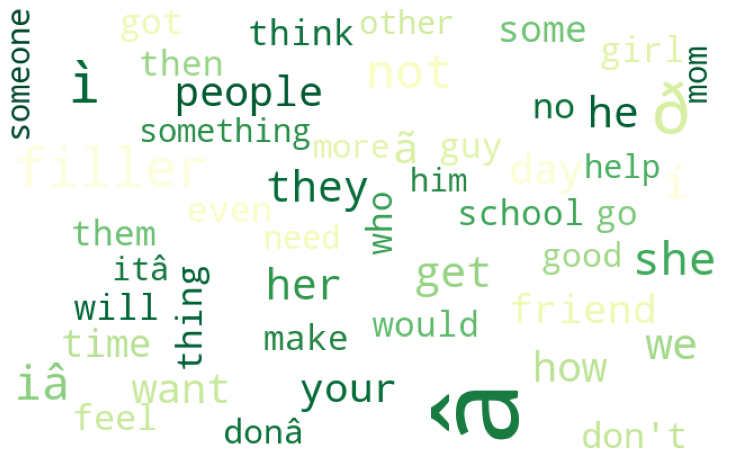

In [25]:
from wordcloud import WordCloud

stopwords=['hey','fuck','fucking','u','are','s', 'have', 'this', 'to', 'in', 'of','but','put','any', 
           'the', 'that','an', 'so', 'with','was','sti ','I\'m', 'wanna', 'NaN', 'goin', 'now', 'sti', 
           'just', 'was', 'really', 'and', 'text', 'since', 'all', 'why', 'up', 'object', 'Length', 
           'actually', 'dtype', 'fact', 'abou ','Name', 'took', 'made', 'at', 'for', 'everytime','somehow', 
           'all', 'out', 'a', 'do', 'post', 'it', 'is', 'me', 'am', 'like', 'om', 'you', 'been', 
           'because', 'when', 'what', 'about', 'say', 'on', 't', 'from', 'ha', 'm', 'can', 'one', 'don', 
           'year', 'be', 'im', 'there', 'much','see', 'n', 've', 'know', 'going', 'or', 'if', 'as', 'off',
           'ago','has', 'here', 'my', 'i', 'I\'m', 'it', 'had', 'keep']

nsdata = df[df["class"] == "non-suicide"]
all_words = ' '.join([text for text in nsdata.text])
img = WordCloud(width = 640, height = 400,
               background_color = 'White', colormap = 'YlGn',
               stopwords =stopwords,
               max_words= 50,
               max_font_size=100,
               random_state= 20,
               collocations=False).generate(all_words)

plt.figure(figsize=(10,20))
plt.subplots_adjust(left=0, right=1,top=1, bottom=0)
plt.imshow(img)
plt.axis('off')

plt.show()

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Error loading stopwords: [WinError 10060] A connection
[nltk_data]     attempt failed because the connected party did not
[nltk_data]     properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond


In [27]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df1_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df1_frequency = df1_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df1_frequency, x = "Word", y = "Frequency", color = 'lightgreen')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

# Data visualization

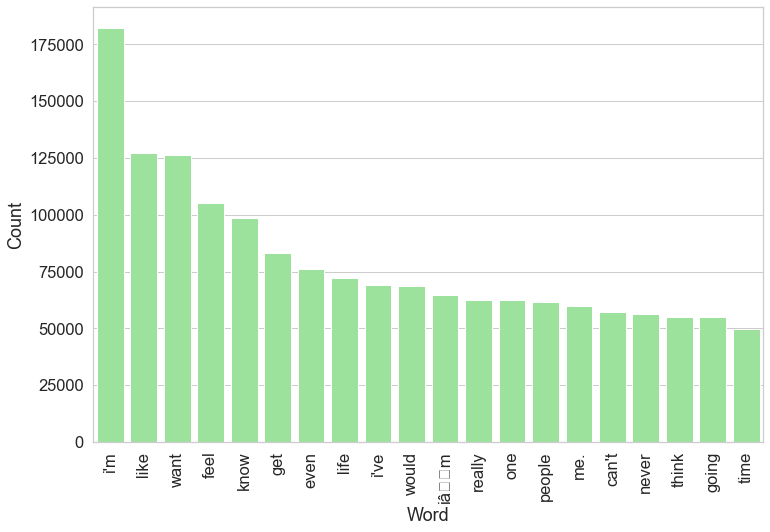

In [28]:
counter(df[df["class"] == "suicide"], "text", 20)

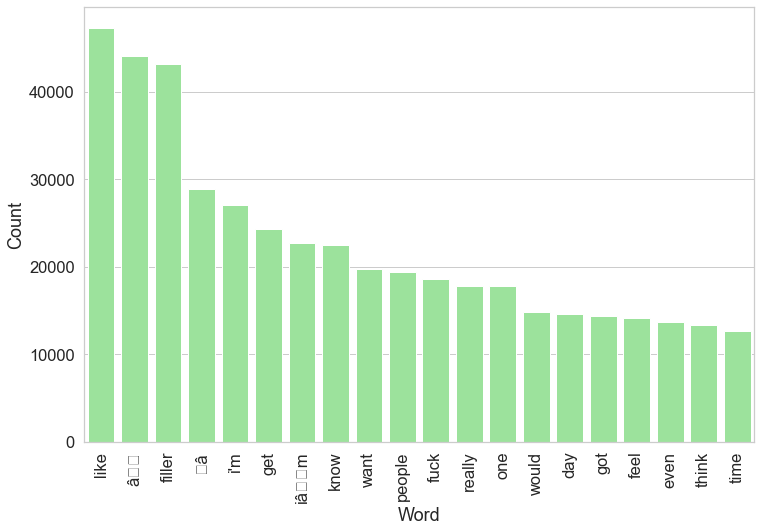

In [29]:
counter(df[df["class"] == "non-suicide"], "text", 20)

Text(0.5, 1.0, 'Suicide - Polarity')

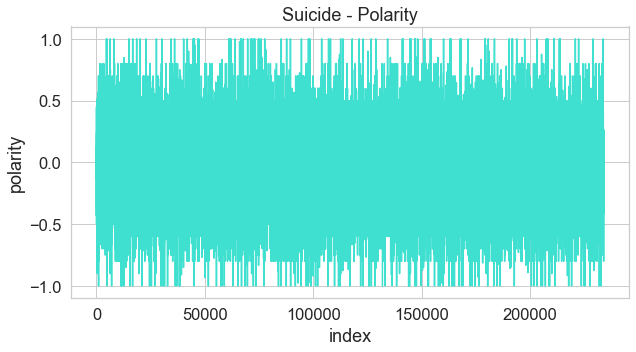

In [30]:
sdata['polarity'].plot(color='turquoise')
plt.xlabel('index')
plt.ylabel('polarity')
plt.title('Suicide - Polarity')

Text(0.5, 1.0, 'Non-Suicide - Polarity')

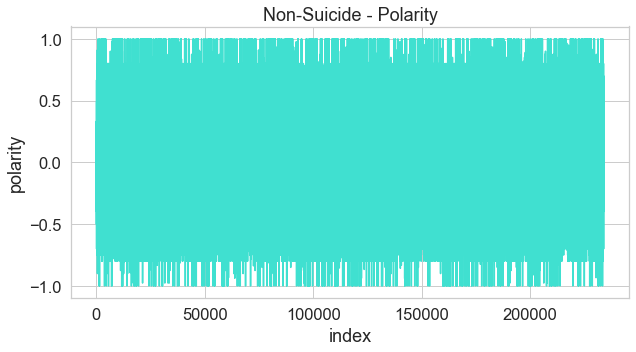

In [31]:
nsdata['polarity'].plot(color='turquoise')
plt.xlabel('index')
plt.ylabel('polarity')
plt.title('Non-Suicide - Polarity')

In [32]:
#sns.histplot(x='class',y='polarity',data=df, color='turquoise')

In [33]:
#df['polarity1']=df['polarity']*4
#df.plot.scatter(x='polarity1',y='class',c='turquoise',marker='.') ## this column was introduced to understand the pattern since the dataset is huge

<AxesSubplot:xlabel='polarity', ylabel='result'>

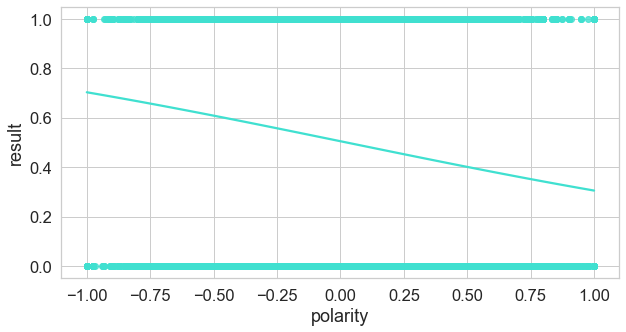

In [34]:
x=df['polarity']
y=df['result']
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None, color='turquoise')

In [35]:
df['sp']=df['subjectivity']*df['polarity']
df['sp']

0         0.086953
1         0.019444
2         0.030000
3        -0.042614
4        -0.155510
            ...   
233831    0.016780
233832    0.201070
233833    0.055000
233834   -0.011952
233835   -0.070000
Name: sp, Length: 233836, dtype: float64

In [36]:
#sns.lmplot(x='sp',y='polarity',data=df,hue='class',scatter_kws={'s':1,'alpha':0.5},palette='mako', height=8, aspect=2, legend = False)

# Converting text to bag of words

In [37]:
#import nltk
#nltk.download('punkt')

In [38]:
Text = df['text']

from nltk.tokenize import word_tokenize

#to split the sentences into words
Text = Text.apply(word_tokenize)
Text.head()

0    [ca, n't, anymore.i, know, else, do, ., i, 'm,...
1    [13-15, year, old, women, send, (, 15, male, )...
2    [birthday, today, fuck, peace, love, â¥ï¸â®...
3    [know, do.i, 've, money, trouble, long, time, ...
4    [guys, itâs, going, well, yesterday, got, gi...
Name: text, dtype: object

In [43]:
df1 = pd.DataFrame({'col':Text})

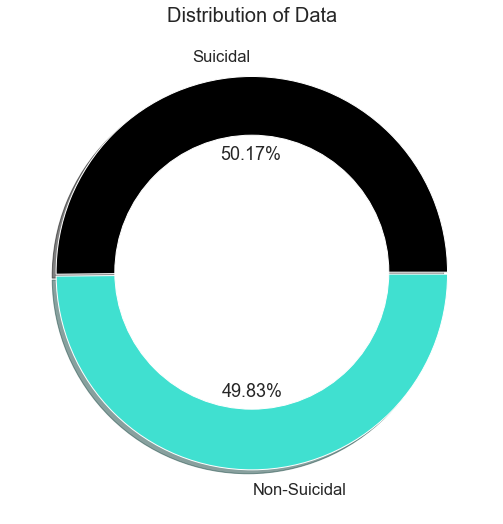

In [44]:
size = df['result'].value_counts()
colors = ['black', 'turquoise']
labels = "Suicidal", "Non-Suicidal"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Data', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
#plt.legend()
plt.show()

In [45]:
#import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [47]:
def lemmatized_words(text):
    lemm = nltk.stem.WordNetLemmatizer()
    df1['lemmatized_text'] = list(map(lambda word:
                                     list(map(lemm.lemmatize, word)),
                                     df1.col))
    

lemmatized_words(df1.col)

In [48]:
bow_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
x = bow_converter.fit_transform(df1['col'])

words = bow_converter.get_feature_names()
len(words)

260516

In [49]:
data_new = df.join(df1)
data_new.head()

,text,class,result,polarity,subjectivity,sp,col,lemmatized_text
0,can't anymore.i know else do. i'm point return...,suicide,1,0.131250,0.662500,0.086953,"[ca, n't, anymore.i, know, else, do, ., i, 'm,...","[ca, n't, anymore.i, know, else, do, ., i, 'm,..."
1,13-15 year old women send (15 male) dm would a...,non-suicide,0,0.116667,0.166667,0.019444,"[13-15, year, old, women, send, (, 15, male, )...","[13-15, year, old, woman, send, (, 15, male, )..."
2,birthday today fuck peace love â¥ï¸â®ï¸â...,non-suicide,0,0.050000,0.600000,0.030000,"[birthday, today, fuck, peace, love, â¥ï¸â®...","[birthday, today, fuck, peace, love, â¥ï¸â®..."
3,"know do.i've money trouble long time, despite ...",suicide,1,-0.098280,0.433598,-0.042614,"[know, do.i, 've, money, trouble, long, time, ...","[know, do.i, 've, money, trouble, long, time, ..."
4,guys itâs going well yesterday got girlâs ...,non-suicide,0,-0.257143,0.604762,-0.155510,"[guys, itâs, going, well, yesterday, got, gi...","[guy, itâs, going, well, yesterday, got, gir..."


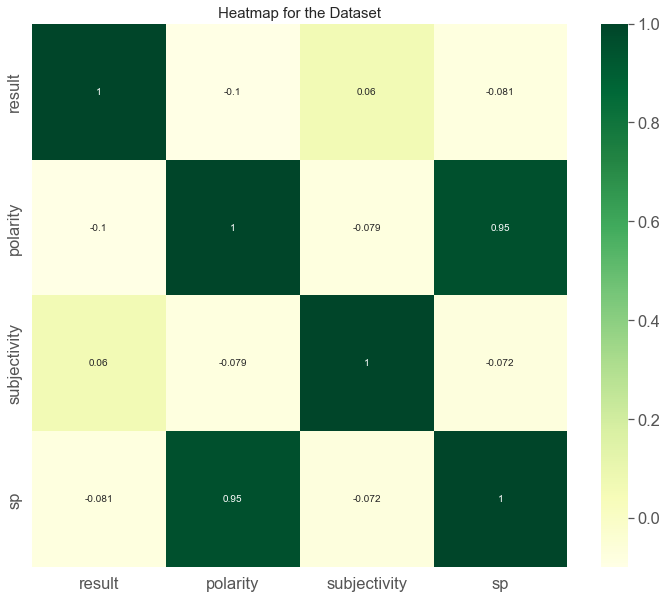

In [50]:
from matplotlib.pyplot import cm
plt.rcParams['figure.figsize'] = (12, 10)
plt.style.use('ggplot')

sns.heatmap(data_new.corr(), annot = True, cmap = 'YlGn')
plt.title('Heatmap for the Dataset', fontsize = 15)
plt.show()

# Training and Testing data

In [51]:
data_new.drop(['col','text','class','polarity','subjectivity'], inplace=True, axis=1)

In [52]:
X_tr,X_te,y_tr,y_te = train_test_split(data_new[['lemmatized_text','sp']], data_new.result, test_size=0.3, random_state=42)

In [53]:
transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False)

In [54]:
X_tr = transform.fit_transform(X_tr['lemmatized_text'])

In [55]:
len(transform.vocabulary_)

8057645

In [56]:
X_te = transform.transform(X_te['lemmatized_text'])

# Logistic regression

In [57]:
model = LogisticRegression(solver='saga', random_state=2)

In [58]:
model.fit(X_tr, y_tr)

LogisticRegression(random_state=2, solver='saga')

In [59]:
y_pred_log = model.predict(X_te)

In [60]:
model.score(X_tr, y_tr)

0.7756361303723616

In [61]:
model.score(X_te, y_te)

0.7433536228991746

In [62]:
confusion_matrix(y_te, y_pred_log)

array([[19058, 16113],
       [ 1891, 33089]], dtype=int64)

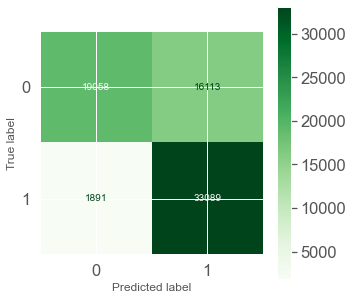

In [63]:
cm = confusion_matrix(y_te, y_pred_log)
plt.rcParams['figure.figsize'] = (5, 5)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm.plot(cmap=plt.cm.Greens)
plt.show()

In [64]:
print(classification_report(y_te, y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.54      0.68     35171
           1       0.67      0.95      0.79     34980

    accuracy                           0.74     70151
   macro avg       0.79      0.74      0.73     70151
weighted avg       0.79      0.74      0.73     70151



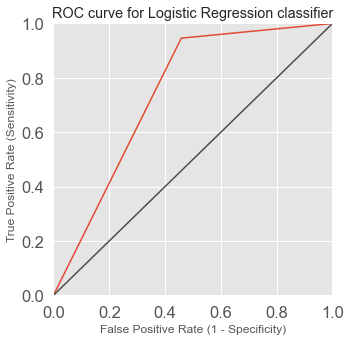

In [65]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_te, y_pred_log)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Logistic Regression classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Random forest

In [66]:
model_rf = RandomForestClassifier(max_depth=5, random_state=1)

In [67]:
model_rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=5, random_state=1)

In [68]:
y_pred = model_rf.predict(X_te)

In [69]:
model_rf.score(X_tr, y_tr)

0.6723707120383664

In [70]:
model_rf.score(X_te, y_te)

0.6695414177987484

In [71]:
confusion_matrix(y_te, y_pred)

array([[34110,  1061],
       [22121, 12859]], dtype=int64)

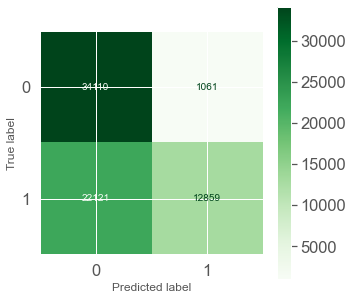

In [72]:
cm = confusion_matrix(y_te, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm.plot(cmap=plt.cm.Greens)
plt.show()

In [73]:
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.97      0.75     35171
           1       0.92      0.37      0.53     34980

    accuracy                           0.67     70151
   macro avg       0.77      0.67      0.64     70151
weighted avg       0.76      0.67      0.64     70151



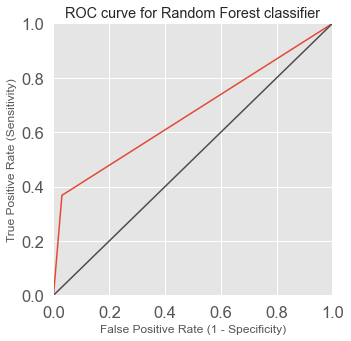

In [74]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_te, y_pred)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Random Forest classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# MLP

In [75]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(6,5), random_state=5,
                    verbose=True,
                    #early_stopping = True,
                    #max_iter = 10,
                    learning_rate_init=0.01)
mlp.fit(X_tr,y_tr)

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [76]:
ypred_mlp=mlp.predict(X_te)
from sklearn.metrics import accuracy_score
accuracy_score(y_te,ypred_mlp)

0.4986956707673447

In [77]:
cm = confusion_matrix(y_te, ypred_mlp)
cm

array([[    4, 35167],
       [    0, 34980]], dtype=int64)

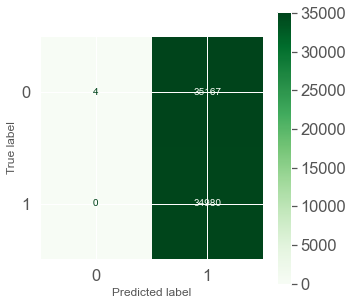

In [78]:
cm = confusion_matrix(y_te, ypred_mlp)
plt.rcParams['figure.figsize'] = (5, 5)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm.plot(cmap=plt.cm.Greens)
plt.show()

In [79]:
print(classification_report(y_te, ypred_mlp))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     35171
           1       0.50      1.00      0.67     34980

    accuracy                           0.50     70151
   macro avg       0.75      0.50      0.33     70151
weighted avg       0.75      0.50      0.33     70151



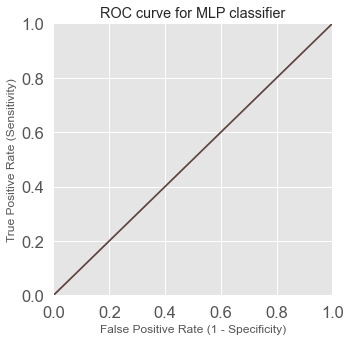

In [80]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_te, ypred_mlp)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for MLP classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Application

In [81]:
pip install nest_asyncio

In [82]:
import nest_asyncio
nest_asyncio.apply()
import json
import os

# Using OS library to call CLI commands in Python

os.system("snscrape --jsonl --max-results 100 twitter-search 'from:ratbastardev'> sucidaltweets.json")
import pandas as pd

tweets_df = pd.read_json('sucidaltweets.json', lines=True)
tweets_df.head()

""


In [83]:
ladygaga = pd.read_csv("C:/Users/USER/Downloads/lgaga.csv")
ladygaga.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1.595480e+18,CHROMATICA BALL TOUR MERCH AVAILABLE NOW ⚔️💓 h...,Lady Gaga,ladygaga,2022-11-23T18:06:29.000Z,Wed Nov 23 18:06:29 +0000 2022,14334,2141,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,http://shop.ladygaga.com,0,0,video,https://video.twimg.com/ext_tw_video/159547793...,NaN,NaN,NaN
1,1.592630e+18,I am so honored to be nominated for 2 Grammys ...,Lady Gaga,ladygaga,2022-11-15T21:11:30.000Z,Tue Nov 15 21:11:30 +0000 2022,48764,6265,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,NaN,0,0,NaN,NaN,NaN,NaN,NaN
2,1.582440e+18,RT @BTWFoundation : DRUMROLL PLEASE! 🥁 Born Th...,Lady Gaga,ladygaga,2022-10-18T18:46:20.000Z,Tue Oct 18 18:46:20 +0000 2022,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,https://bornthisway.foundation/advisory-board-...,0,0,animated_gif,https://video.twimg.com/tweet_video/FfXMU_dWQA...,NaN,NaN,NaN
3,1.578080e+18,Each @BTWFoundation Kindness in Community Fund...,Lady Gaga,ladygaga,2022-10-06T17:39:00.000Z,Thu Oct 06 17:39:00 +0000 2022,6693,881,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,https://www.channelkindness.org/dispatches-fro...,0,2,NaN,NaN,NaN,NaN,NaN
4,1.573100e+18,Thank you ⁦@TeenVogue⁩ I’m so proud of our ⁦@h...,Lady Gaga,ladygaga,2022-09-23T00:04:22.000Z,Fri Sep 23 00:04:22 +0000 2022,8414,958,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,https://www.teenvogue.com/story/best-new-beaut...,0,2,NaN,NaN,NaN,NaN,NaN


In [84]:
ladygaga.drop(['Tweet Id', 'Name', 'Screen Name', 'UTC', 'Created At',
       'Favorites', 'Retweets', 'Language', 'Client', 'Tweet Type', 'URLs',
       'Hashtags', 'Mentions', 'Media Type', 'Media URLs', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18'], axis=1,inplace=True)

In [85]:
ladygaga['content'] = ladygaga['Text']

In [86]:
ladygaga.drop(['Text'],axis=1,inplace=True)

In [87]:
for columns in ladygaga.columns:
    ladygaga[columns] = ladygaga[columns].str.lower() 

In [88]:
def sentiment_calc(text):
    try:
        return TextBlob(text).polarity
    except:
        return None

ladygaga['polarity'] = ladygaga['content'].apply(sentiment_calc)

In [89]:
def sentiment_calc(text):
    try:
        return TextBlob(text).subjectivity
    except:
        return None

ladygaga['subjectivity'] = ladygaga['content'].apply(sentiment_calc)

In [90]:
ladygaga['sp']=ladygaga['polarity']*ladygaga['subjectivity']

In [91]:
ladygaga.fillna

<bound method DataFrame.fillna of                                                 content  polarity  \
0     chromatica ball tour merch available now ⚔️💓 h...  0.400000   
1     i am so honored to be nominated for 2 grammys ...  0.233333   
2     rt @btwfoundation : drumroll please! 🥁 born th...  0.142187   
3     each @btwfoundation kindness in community fund...  0.300000   
4     thank you ⁦@teenvogue⁩ i’m so proud of our ⁦@h...  0.484091   
...                                                 ...       ...   
3130  rt @techhofficial : first look: lady gaga as t...  0.250000   
3131  can u blame me for being in love w my assistan...  0.500000   
3132  .@therealdaphne not only the glove in both bla...  0.000000   
3133  let the countdown begin #ahshotel #3weeks 🔪💋- ...  0.000000   
3134  rt @ellemagazine : lady gaga is totally a stag...  0.000000   

      subjectivity        sp  
0         0.400000  0.160000  
1         0.266667  0.062222  
2         0.418750  0.059541  
3         0.5

In [92]:
ladygaga.head()

,content,polarity,subjectivity,sp
0,chromatica ball tour merch available now ⚔️💓 h...,0.400000,0.400000,0.160000
1,i am so honored to be nominated for 2 grammys ...,0.233333,0.266667,0.062222
2,rt @btwfoundation : drumroll please! 🥁 born th...,0.142187,0.418750,0.059541
3,each @btwfoundation kindness in community fund...,0.300000,0.550000,0.165000
4,thank you ⁦@teenvogue⁩ i’m so proud of our ⁦@h...,0.484091,0.438636,0.212340


In [93]:
df_ladygaga = ladygaga.copy()
df_ladygaga['content'] = df_ladygaga['content'].astype(str)

In [94]:
df_ladygaga = pd.DataFrame({'col':Text})

In [95]:
df_ladygaga.head()

,col
0,"[ca, n't, anymore.i, know, else, do, ., i, 'm,..."
1,"[13-15, year, old, women, send, (, 15, male, )..."
2,"[birthday, today, fuck, peace, love, â¥ï¸â®..."
3,"[know, do.i, 've, money, trouble, long, time, ..."
4,"[guys, itâs, going, well, yesterday, got, gi..."


In [96]:
def lemmatized_words(text):
    lemm = nltk.stem.WordNetLemmatizer()
    df_ladygaga['lemmatized_text'] = list(map(lambda word:
                                     list(map(lemm.lemmatize, word)),
                                     df_ladygaga.col))
    

lemmatized_words(df_ladygaga.col)

In [97]:
bow_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
x = bow_converter.fit_transform(df_ladygaga['col'])
words = bow_converter.get_feature_names()
len(words)

260516

In [98]:
df_ladygaga['ladygaga_text'] = df_ladygaga['lemmatized_text']

In [99]:
df_ladygaga['res'] = 0

In [100]:
df_ladygaga_new = df_ladygaga.join(ladygaga)
df_ladygaga_new.head()

,col,lemmatized_text,ladygaga_text,res,content,polarity,subjectivity,sp
0,"[ca, n't, anymore.i, know, else, do, ., i, 'm,...","[ca, n't, anymore.i, know, else, do, ., i, 'm,...","[ca, n't, anymore.i, know, else, do, ., i, 'm,...",0,chromatica ball tour merch available now ⚔️💓 h...,0.400000,0.400000,0.160000
1,"[13-15, year, old, women, send, (, 15, male, )...","[13-15, year, old, woman, send, (, 15, male, )...","[13-15, year, old, woman, send, (, 15, male, )...",0,i am so honored to be nominated for 2 grammys ...,0.233333,0.266667,0.062222
2,"[birthday, today, fuck, peace, love, â¥ï¸â®...","[birthday, today, fuck, peace, love, â¥ï¸â®...","[birthday, today, fuck, peace, love, â¥ï¸â®...",0,rt @btwfoundation : drumroll please! 🥁 born th...,0.142187,0.418750,0.059541
3,"[know, do.i, 've, money, trouble, long, time, ...","[know, do.i, 've, money, trouble, long, time, ...","[know, do.i, 've, money, trouble, long, time, ...",0,each @btwfoundation kindness in community fund...,0.300000,0.550000,0.165000
4,"[guys, itâs, going, well, yesterday, got, gi...","[guy, itâs, going, well, yesterday, got, gir...","[guy, itâs, going, well, yesterday, got, gir...",0,thank you ⁦@teenvogue⁩ i’m so proud of our ⁦@h...,0.484091,0.438636,0.212340


# Using Logistic regression

In [101]:
X ,X_test,y_train,y_test = train_test_split(df_ladygaga_new[['ladygaga_text','sp']], df_ladygaga_new.res, test_size=0.3, random_state=42)

In [102]:
transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False) 

X = transform.fit_transform(X['ladygaga_text'])

len(transform.vocabulary_)

8057645

In [103]:
y_pred_ladygaga = model.predict(X)

In [104]:
model.score(X, y_train)

0.3174573112991416

In [105]:
ypr = pd.DataFrame(y_pred_ladygaga)
frame1=[X_test, ypr]
data_model = pd.merge(ladygaga['content'], ypr, left_index=True, right_index=True)
data_model['prediction'] = data_model[0]
data_model.drop(0, axis = 1, inplace=True)
data_model.head()

,content,prediction
0,chromatica ball tour merch available now ⚔️💓 h...,0
1,i am so honored to be nominated for 2 grammys ...,1
2,rt @btwfoundation : drumroll please! 🥁 born th...,1
3,each @btwfoundation kindness in community fund...,1
4,thank you ⁦@teenvogue⁩ i’m so proud of our ⁦@h...,1


In [106]:
data_model.head(15)

,content,prediction
0,chromatica ball tour merch available now ⚔️💓 h...,0
1,i am so honored to be nominated for 2 grammys ...,1
2,rt @btwfoundation : drumroll please! 🥁 born th...,1
3,each @btwfoundation kindness in community fund...,1
4,thank you ⁦@teenvogue⁩ i’m so proud of our ⁦@h...,1
5,https://t.co/r4xajhtzqo,1
6,rt @gagadaily : today in 2010: 24-year-old lad...,1
7,rt @lmaoxal : @ladygaga tour of the fucking de...,0
8,"i love you little monsters, forever xoxo, moth...",0
9,@xoxoimitalian i love you ❤️😘💕,0


In [107]:
data_model.tail(15)

,content,prediction
3120,when ur awoken 3:45am by ur crazy friends bein...,0
3121,"learning lines, writing songs, rolling around ...",0
3122,rt @formichetti : nicopnada s/s 16 presentatio...,1
3123,rt @oprah : sharing this with all my college d...,0
3124,while @bobby_campbell sits courtside with a la...,0
3125,rt @vj44 : thank you @ladygaga &amp; @diane_wa...,0
3126,#tilithappenstoyou is available now for downlo...,1
3127,watch #tilithappenstoyou psa: http://t.co/q9kw...,1
3128,we hope u feel our love&amp;solidarity through...,0
3129,".@diane_warren &amp; i made ""til it happens to...",0


In [108]:
pd.set_option('display.max_colwidth', None)
data_model.iloc[3089]

content       some people just like to drink blood for fun. #ahspremiere #ahsfans #ahshotel https://t.co/emk8lnis0z
prediction                                                                                                        1
Name: 3089, dtype: object

In [114]:
pd.set_option('display.max_colwidth', None)
data_model.iloc[125]

content       rt @hauslabs : makeup can be *good* to your skin 💥 our new clean products are packed with potent, innovative ingredients + complexes that deliver skincare benefits https://t.co/bwwf4rktr7
prediction                                                                                                                                                                                              0
Name: 125, dtype: object

In [110]:
pd.set_option('display.max_colwidth', None)
data_model.iloc[1325]

content       don’t forget to watch!! i had so much fun performing for my pops!  #eltonsalute #eltonrevamp https://t.co/pr2ktysaop
prediction                                                                                                                       1
Name: 1325, dtype: object